# v0.16.x

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows=12
pd.options.display.width=80
%matplotlib inline

## assign & pipe

In [15]:
df = pd.read_csv('data/iris.csv',index_col=False)
df.columns = df.columns.str.replace('\s+','_').str.lower()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica


In [16]:
(df.assign(sepal_ratio = df['sepal_width'] / df['sepal_length'])
    .head())

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [43]:
df2 = df.copy()
df2['sepal_ratio'] = df['sepal_width'] / df['sepal_length']
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


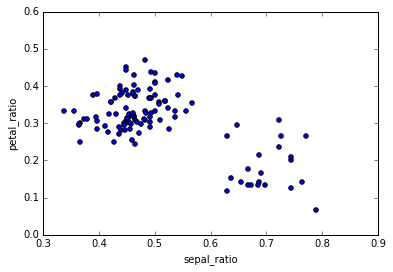

In [17]:
(df.query('sepal_length > 5')
        .assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
                petal_ratio = lambda x: x.petal_width / x.petal_length)
        .plot(kind='scatter', x='sepal_ratio', y='petal_ratio'))

/Users/jreback/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


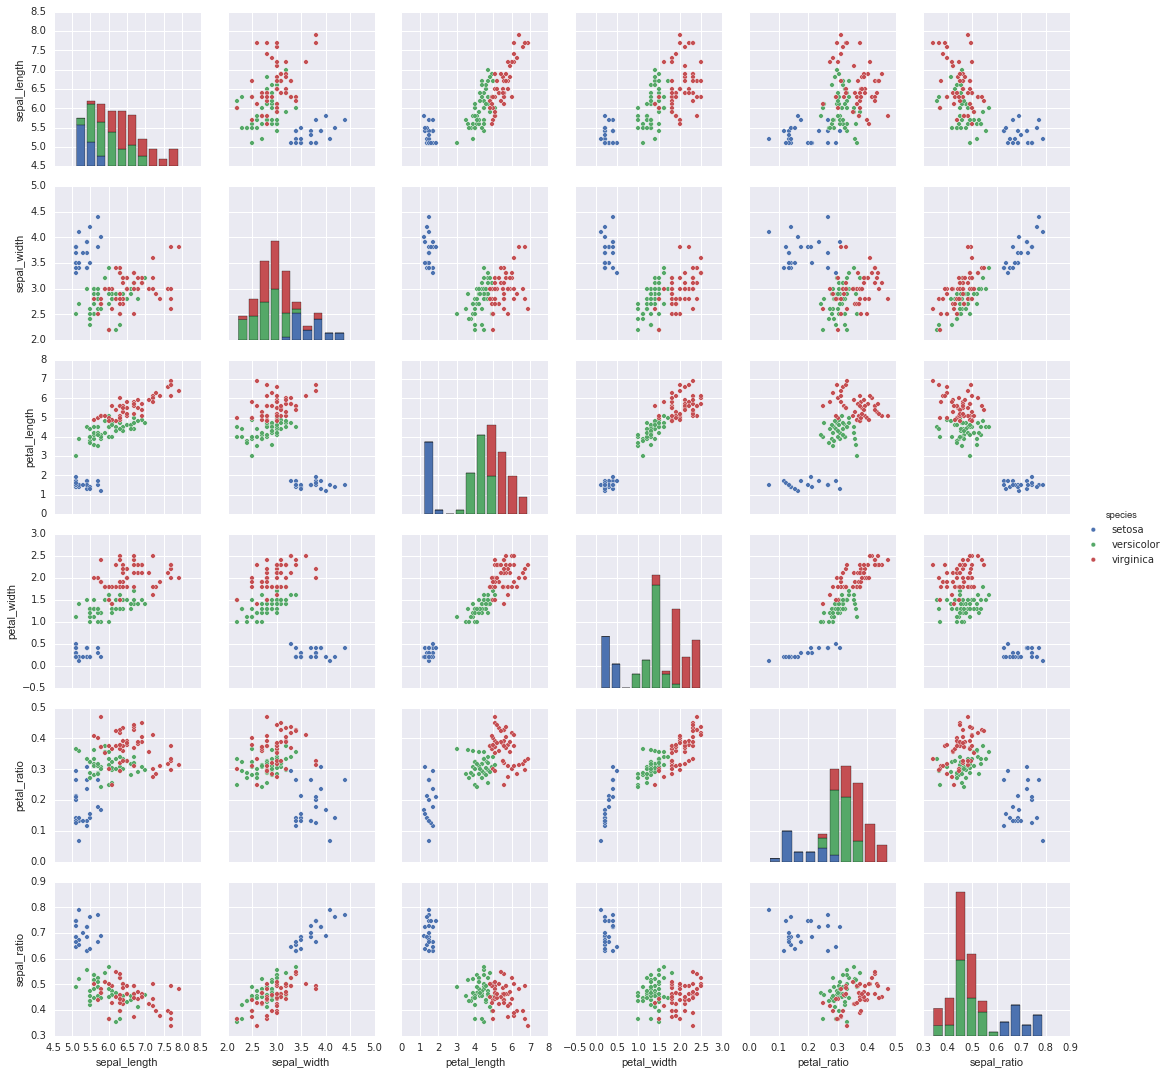

In [22]:
(df.query('sepal_length > 5')
        .assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
                petal_ratio = lambda x: x.petal_width / x.petal_length)
        .pipe(sns.pairplot, hue='species'))

# sample

In [24]:
df.sample(n=20)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
66,5.6,3.0,4.5,1.5,versicolor
86,6.7,3.1,4.7,1.5,versicolor
92,5.8,2.6,4.0,1.2,versicolor
112,6.8,3.0,5.5,2.1,virginica
80,5.5,2.4,3.8,1.1,versicolor
...,...,...,...,...,...
110,6.5,3.2,5.1,2.0,virginica
82,5.8,2.7,3.9,1.2,versicolor
108,6.7,2.5,5.8,1.8,virginica


In [29]:
# train, test
train = df.sample(frac=0.10)
test = df.loc[df.index.difference(train.index)]

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 146 to 129
Data columns (total 5 columns):
sepal_length    15 non-null float64
sepal_width     15 non-null float64
petal_length    15 non-null float64
petal_width     15 non-null float64
species         15 non-null object
dtypes: float64(4), object(1)
memory usage: 720.0+ bytes


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    135 non-null float64
sepal_width     135 non-null float64
petal_length    135 non-null float64
petal_width     135 non-null float64
species         135 non-null object
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


# CategoricalIndex

In [35]:
r = df.assign(species = df.species.astype('category')).set_index('species')
r

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
...,...,...,...,...
virginica,6.7,3.3,5.7,2.5
virginica,6.7,3.0,5.2,2.3


In [36]:
r.index

CategoricalIndex([u'setosa', u'setosa', u'setosa', u'setosa', u'setosa', u'setosa', u'setosa',
                  u'setosa', u'setosa', u'setosa',
                  ...
                  u'virginica', u'virginica', u'virginica', u'virginica', u'virginica',
                  u'virginica', u'virginica', u'virginica', u'virginica', u'virginica'],
                 categories=[u'setosa', u'versicolor', u'virginica'], ordered=False, name=u'species', dtype='category', length=150)

In [38]:
res = r.groupby(level='species').sepal_width.agg({'mean' : 'mean', 'std' : 'std'})
res

,std,mean
species,,
setosa,0.381024,3.418
versicolor,0.313798,2.770
virginica,0.322497,2.974


In [41]:
res.index

CategoricalIndex([u'setosa', u'versicolor', u'virginica'], categories=[u'setosa', u'versicolor', u'virginica'], ordered=False, name=u'species', dtype='category')